In [ ]:
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split  

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.initializers import Constant  
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import regularizers
from keras import backend as K
from tensorflow.keras.callbacks import *
from tensorflow.keras import utils

import torch

In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import pickle
import time
import re
import nltk
import sys
import html
import xml.sax.saxutils as saxutils
from io import StringIO
from html.parser import HTMLParser

from transformers import BertTokenizer, BertModel
from transformers import DistilBertModel,DistilBertTokenizer

from scipy.spatial.distance import cosine

from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")
#Stem=stemmer.stem

#from nltk.stem import WordNetLemmatizer
#wordnet_lemmatizer = WordNetLemmatizer()
#lemm=wordnet_lemmatizer.lemmatize

In [ ]:
'''
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased',
                                       output_hidden_states = True, # Whether the model returns all hidden-states.
                                       )  
'''
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased',
                                       output_hidden_states = True, # Whether the model returns all hidden-states.
                                       )


In [ ]:
#print(len(cachedStopWords))
#print(len(cachedStopWords))
#print(type(cachedStopWords))
nltk_stopwords=set(cachedStopWords)

english_alghabet=['b','c','e','f','g','h','j','k','l','n','p','q','r','u','v','w','x','z']

numbers_remove=['one','two','three','four','five','six','seven','eight','nine','ten','tens','twenty',
                'fourty','fifty','sixty','seventy','eighty','ninety','hundred','hundreds','million','billion','trillion',
                'millions','thousand','thousands','second','third','forth','tenth','billions','trillions'] 


miscellaneous_remove=['absolutely', 'actually', 'adieu', 'ain', "ain't", 'aint', 'almost','approximately','arent',
                      'bravo', 'briefly', 'bye','cant', 'certainly', 'chrissakes', 'clearly', 'completely','couldnt',
                      'alright','alrighty', 'apparently', 'brilliant','congrat', 'congrats','congratulation', 
                      'congratulations','consequently', 'darnit', 'de','dear', 'definitely','didn', 'doesn', 'don',
                      'eg','e.g.','i.e.','encore','entirely', 'especially', 'et', 'etc','hopefully','important',
                      'ex', 'exactly', 'excellent','fantastic','here','there','hello', 'hi','ie','just', "it'd", "it'll",
                      'felicitation', 'felicitations','finally', 'fully','furthermore', 'gadzooks','hallo',
                      'immediately', 'kg', 'km','let', 'lets', 'likely', 'greetings','hardly','hasnt', 'haven', 
                      'magnificent', 'necessary', 'non','merely', 'then','too',
                      'myself','yourself','yourselves','himself','herself','hisself','ourselves','themsleves',
                      'maybe', 'never',  'nearly', 'normally', 'obviously', 'ok', 'okay', 'ones',
                      'other','others','only', 'great', 'particular', 'particularly', 'please',
                      'awesome','awfully','amazing','interesting','amoungst', 'anybody', 'anymore', 'anyways', 'apart', 
                      'anytime', 'appropriate', 'behold', 'better', 'bad','best', 'good', 'goodby','goodness',
                      'aka','lol' , 'brb', 'lmk', 'ama', 'tbh', 'irl', 'tl;dr','overall', 'overally', 
                      'possibly', 'potentially', 'predominantly', 'presumably', 'previously','primarily', 'probably',
                      'promptly', 'readily', 'really', 'reasonably', 'recent', 'recently', 'ref','refs',
                      'relatively', 'respectively','substantially', 'successfully', 'sufficiently',
                      'sure', "t's", 'th', 'thank', 'thanks', 'thanx', "that've", 'thats', 'there', "there'll",
                      "there've", 'thered', 'thereof', 'therere', 'theres', 'thereto', 'theyd', 'theyre', 
                      'thoroughly', 'tnx', 'truly', 'usually','welcome', 'well', 'yes','urdddd','fab' ,
                      'much','many','less','least','few','lots','lot','fewer','fewset','therefore','pm',
                      'afaik', 'br', 'idk','smh','qotd', 'ftw','bfn','yw', 'icymi','fomo','smdh', 'b4','imho',
                      'mr','madam','sir','mrs','easy', 'difficult','totally',
                      
                      'disappointing',  'downwards', 'disgusting','dude','down',
                      'everybody', 'far', 'funny', 'gracious', 
                      'hither','higher', 'including', 'howbeit',  'inasmuch', 'inner', 'insofar', 'instead', 'inward', 
                      'indeed', 'inside','kertyschoo',  'lackaday', 
                      'largely', 'lately', 'later','lovely','large','big','small',
                      'lest', 'little', 'ltd', 'lower', 'mainly', 'marvelous', 'meantime', 'minus', 'near',
                      'outside', 'over','plus', 'poorly', 'possible','up','promising',
                      'regardless', 'related',  'resulting', 'right', 'sec', 
                      'secondly','self', 'selves', 'seriously', 'shall', 'shucks','somebody', 'somethan',
                      'somewhat', 'soon', 'late' , 'sorry', 'stupid', 'sub', 'useful','super', 'thorough',
                      'today','yesterday','tomorrow','night',"morning",'afternoon','noon','tonight',
                      'evening','day','everyday', 'everynight','todays','nights','mornings','noons','afternoons','days',
                      'evenings','week','month','year',
                      'twice', 'undoubtedly','unfortunately', 'unlike','unlikely',
                      'unto',   'vs', 'went', 'werent', 'what', 'whatever', 'wheres', 'widely',
                      'wonderful', 'wont', 'wouldnt', 'wrong', 'worst','worse','www',  'youd', 'youre', 'yummy', 
                      'zoinks','literally','literal','pleasure','effective','fabulous','delighted',
                      'saturday','sunday','monday','tuesday','wednesday','thursday', 'friday','past','future','suitable',
                      'delightful','absolute','pleasure','huge','latest','nowadays',
                      'january','february','april','june','july','august','september','october',
                      'november','december', 'autumn' ,'spring','winter','summer',
                      'weekend','south','north','west','east','asia','africa','europe','america',
                      'come', 'comes', 'coming', 'came', 'seems', 'gives', 'gave', 'makes', 'made', 'keeps', 'kept', 
                      'calls', 'called', 'says', 'saying', 'said', 'goes', 'went', 'gone', 'got', 'saw', 'seen', 'shows',
                      'shown', 'took', 'taken', 'uses', 'moved', 'moves', 'puts',
                      'using','seem','give','make','keep','call','say','go','get','see','seems','seeming',
                      'seemed','show','take','made','used','move','become','became','becoming','becomes','put','use',
                      'find', 'finds', 'finding']                  
                      

interjection_remove=['aaaahh', 'aaah', 'aaargh', 'aaay', 'aagh', 'aah',
                   'aargh', 'achoo', 'adios', 'ah', 'aha', 'ahem', 'ahh', 'ahhh',
                   'ahoy', 'alas', 'allo', 'amen', 'areet', 'argh', 'arrggh',
                   'arrividerci', 'asap', 'attaboy', 'avaunt', 'aw', 'aw', 'aww',
                   'awww', 'ay', 'ay', 'aye', 'ayeaugh', 'bada', 'badum', 'bah',
                   'bahaha', 'bam', 'bazinga', 'behold', 'bingce', 'bingo', 'blah',
                   'blech', 'bleh', 'blimey', 'bonjour', 'boo', 'booh', 'boohoo',
                   'booyah', 'bravo', 'brr', 'brrrr', 'btw', 'bwahaha', 'capeesh',
                   'capisce', 'cheerio', 'cheers', 'ciao', 'cor', 'cowabunga',
                   'crikey', 'cripes', 'da', 'dabba', 'dah', 'dammit', 'damn', 'dang',
                   'darn', 'de', 'dee', 'di', 'dizamn', 'doh', 'doo', 'drat', 'duh',
                   'dum', 'eeeek', 'eek', 'eep', 'egad', 'egads', 'eh', 'ehem', 'em',
                   'er', 'eureka', 'eww', 'ewww', 'eyh', 'fiddledeedee', 'fie',
                   'fore', 'foul', 'fuff', 'gah', 'gak', 'gee', 'geez', 'gesundheit',
                   'giddyap', 'golly', 'gosh', 'grr', 'grrrr', 'ha', 'hah', 'haha',
                   'hahaha', 'hallelujah', 'halloa', 'harrumph', 'harumph', 'haw',
                   'heck', 'heck', 'heeey', 'heh', 'hehe', 'hey', 'hhh', 'hic', 'hm',
                   'hmm', 'hmmm', 'hmmmm', 'hmmph', 'hmpf', 'ho', 'hola', 'hoo',
                   'hooray', 'howdy', 'hrmm', 'hrmph', 'hrmph', 'hrrmph', 'hu', 'huh',
                   'hullo', 'humph', 'hurrah', 'huzza', 'huzzah', 'ich', 'ick',
                   'ixnay', 'jeepers', 'jeez', 'kaboom', 'kapow', 'kerwham', 'la',
                   'lala', 'lo', 'lordy', 'meh', 'mhm', 'ml', 'mm', 'mmh', 'mmhm',
                   'mmm', 'muahaha', 'mwah', 'mwahaha', 'na','nay','nah', 'nanu', 'nooo', 'nope',
                   'nuh', 'oh', 'ohh', 'oho', 'oi', 'okeydoke', 'om', 'oof', 'ooh',
                   'oomph', 'oooh', 'ooooh', 'oops', 'ouch', 'ow', 'oww', 'oy',
                   'oyez', 'oyh', 'pew', 'pff', 'pffh', 'pfft', 'phew', 'phut',
                   'phweep', 'phwoar', 'phwoarr', 'poof', 'poogh', 'prethee',
                   'prithee', 'prosit', 'pssh', 'psst', 'queep', 'roger', 'salaam',
                   'salam', 'sheesh', 'shh', 'shhh', 'shitfire', 'shoo', 'shoop',
                   'shush', 'sigh', 'sssh', 'strewth', 'ta', 'tarnations', 'tchah',
                   'teehee', 'tish', 'touché', 'tsk', 'tss', 'tut', 'uggh', 'ugh',
                   'uh', 'uhh', 'uhm', 'um', 'umm', 'ummm', 'umph', 'unh', 'upadaisy',
                   'upsadaisy', 'ur', 'urgh', 'vay', 'vayf', 'viva', 'voila', 'waa',
                   'waaaaah', 'waah', 'wah', 'wahey', 'wassup', 'weee', 'welp',
                   'wham', 'whamo', 'whee', 'whew', 'whizz', 'whoa',
                   'whoo', 'whoopee','whoop', 'whoops', 'whoopsy', 'whoosh', 'woah', 'woo',
                   'woohoo', 'wotcha', 'wotcher', 'wow', 'wowsers', 'wowsers',
                   'wuzzup', 'wuzzup', 'wuzzup', 'ya', 'yabba', 'yada', 'yadda',
                   'yak', 'yarooh', 'yay', 'yea', 'yeah', 'yech', 'yee', 'yeeeeaah',
                   'yeehaw', 'yeow', 'yes', 'yessiree', 'yew', 'yikes', 'yippee',
                   'yo', 'yoo', 'yoohoo', 'yow', 'yowza', 'yuck', 'yuh', 'zing',
                   'zoiks', 'zomfg', 'zomg', 'zounds', 'zut'
                   'lol' , 'brb', 'lmk', 'ama', 'tbh', 'irl', "tl;dr"]

import spacy
sp = spacy.load('en_core_web_sm')
spacy_stopwords = sp.Defaults.stop_words
type(spacy_stopwords)
#spacy_exclude=['using','name','seem','give','make','keep','call','say','go','get','see','seems','seeming',
#               'seemed','show','take','made','used','move','become','became','becoming','becomes','put','use']# serious

from stop_words import get_stop_words
stop_words = get_stop_words('en')
stop_words1 = get_stop_words('english')
#print(type(stop_words1))
#print()
#print(stop_words1)
lib_stopwords=set(stop_words1)

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
#print(type(ENGLISH_STOP_WORDS))
#print()
#print(set(ENGLISH_STOP_WORDS))
#sklearn_exclude=['find','get','found','go','see','seem','seems','give','seemed','take','keep','show','put','made'] # system  cry
sklearn_stopwords=set(ENGLISH_STOP_WORDS)

#spacy_stopwords.difference_update(set(spacy_exclude))
#sklearn_stopwords.difference_update(set(sklearn_stopwords))
#for removing "just" one item, use "remove"

temp_1=set(nltk_stopwords)
temp_1.update(lib_stopwords)
temp_1.update(sklearn_stopwords)
temp_1.update(spacy_stopwords)
temp_1.update(set(english_alghabet))
temp_1.update(set(numbers_remove)) 
temp_1.update(set(miscellaneous_remove))
temp_1.update(set(interjection_remove))
cachedStopWords=temp_1
#print(cachedStopWords)
cachedStopWords.update(['rt','be','will','was','were','is','am','are','have','has','had','do','does','done'])
len(cachedStopWords)

In [ ]:
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [ ]:
def cleaning (text):

    #order of lines is important
    
    text=strip_tags(text)
    #text=html.unescape(text) 
    #text=saxutils.unescape(text)
    
    #converting
    text = re.sub("“|”", '''"''', text)  #before next lines
    text = re.sub("’|′|‘|`", "'", text)  #before next lines
    
    #removing tabs and lines
    text=re.sub('\t|\n', ' ', text)
    
    #converting
    text=re.sub('\$|£|€|¥|dollar|dollars|yen|yens|euros', ' money ', text)    # not euro 
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               "]+", flags=re.UNICODE) 
    #removing emoji
    text = emoji_pattern.sub(r' ', text) 
    
    #removing emojis and non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+|,Ä¶',' ', text)  
        
    #convertings words that their lower and uper cases are different
    text=re.sub(" US | U\.S\. ", ' USA ', text) # before lower    

    #converting lower_case
    text = text.lower() 

    #removeing http and https (URL)
    text = re.sub(r'(http://|https://)\S+', '', text)
    
    #removing www (URL)
    text=re.sub(r'www\.\S+', '', text)
    
    #removing targets
    text=re.sub('( |^)@\S+', '', text) 

    '''
    #removing common expressions
    text=re.sub("looking forward to|look forward to|make sure|kidding me|\
                in my opinion|by the way,|as soon as possible|shaking my head|i don't know|I do not know|\
                in real life|quote of the day|as far as i know|shake my head|\
                to be honest|in other words|let me know|just kidding|hope that helps|hat tip|\
                just like that|happy birthday|never mind|well-done|\
                in my humble opinion|happy new year|you're welcome|you are welcome| j/k | lmao | \
                it doesn't matter|it does not matter|i think|i wonder|do you think| fml | bfn | br | ht | hth ", ' ', text)   
    '''          
    #convertings
    text=re.sub("can't", 'cannot', text) # before other n't 
    text=re.sub("can not ", 'cannot ', text)  
    text=re.sub("'ve",' have', text)
    text=re.sub("n't",' not', text)
    text=re.sub("'ll",' will', text)
    text=re.sub("'d",' would', text)
    text=re.sub("'re",' are', text)
    text=re.sub("i'm",'i am', text)
    text=re.sub("=",' equals to ', text)
    text=re.sub("&",' and ', text)
    text=re.sub(" w/ ",' with ', text)
    text=re.sub(" w/i | w/in ",' within ', text)
    text=re.sub(" w/o ",' without ', text)
    text=re.sub(" c/o ",' care of ', text)
    text=re.sub(" h/t ",' hat tip ', text)
    text=re.sub(" b/c ",' because ', text)
#    text=re.sub("=",' equals to ', text)
    text=re.sub("=",' = ', text)
#    text=re.sub("\+",' plus ', text)
    text=re.sub("\+",' + ', text)
    text=re.sub("united states",'usa', text)
    text=re.sub("united kingdom",'uk', text)
    text=re.sub(" the us ",' usa ', text)
    text=re.sub("start-up|start_up",'startup', text)
    text=re.sub("u\.s\.a", 'usa', text)     
    #text=re.sub("aka", 'also known as', text)
    text=re.sub("'"," ' ", text)     

    '''
    text= re.sub("(\?)+", '? ',text) 
    text= re.sub("(!)+", '! ',text) 
    text= re.sub("(\.\.)+", ' ',text)    
    
    #removing some special charachter  
    text= re.sub("[\"\+\-\|\*\?\(\)\/\\\^\[\]<>{}_';•«»,@:~!\=%&]+", ' ',text) #except \.
    #text= re.sub("[\"\“\”\+\-\|\*\?\(\)\/\\\^\[\]\.{}_`′’‘';•«,@:~!\=%&]+", ' ',text) 

    #removing hashtag
    text=re.sub('#', ' ', text) 
       
    #removing numbers not attached to alphabets
    text=re.sub("(^)(\d+)(\.)?(\d+)? ",' ',text)   #removing numer at the beginning
    text=re.sub("(\s)[0-9]?(\.)?(\d+) ",' ',text)
    text= re.sub(" (\.)(\d+) ", ' ',text)
    #text=re.sub("\S+(\d+) ",' ',text) # alphabet+digit (attached)
    #text=re.sub(" (\d+)\S+",' ',text) # digit+alphabet (attached)
    #text=re.sub(" \S+(\d+)\S+ ",' ',text) # alphabet+digit+alphabet (attached)
    #text=re.sub("(\d+)",' ',text)  #removing any number anywhere but keeps \. for decimal numbers
    '''
    #removing space
    text=re.sub('\s+',' ',text)      

    text= nltk.word_tokenize(text)
    #text= text.split() #sometimes

    #removing_stopwords 
    #text_without_sw = [word.lower() for word in text if word.lower() not in stopwords.words()] #very slow
#    text = [word for word in text if word not in cachedStopWords]

    #lemmatization
#    text= [ lemm(word, pos="v") for word in text]
#    text= [ lemm(word, pos="n") for word in text]
#    text= [ lemm(word, pos="a") for word in text]
    
    #stemming 
    #text = [Stem(word) for word in text]
    
    text=' '.join(text)
    text=re.sub("''",'''"''', text)    #since nltk.tokenize converts second " to ''"
    text=re.sub("``",'''"''', text)    # since nltk.tokenize converts first " to " ``

    return text

In [ ]:
text=('http://sdsdfdf.www.f.com 6 going US BY the euro $ way &amp; to #home at 29! 9 0.3 4.5 b2b 6dd ca8 and his book). by the way, He is boy??? and .... ')
cleaning(text)

In [ ]:
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
##cur.execute("SELECT user_id, tweet from ent_2019_100K limit 100000 ")
cur.execute("SELECT user_id, tweet from ent_2019_1000k ")
rows_ent = cur.fetchall()
# there is no repetative tweet
con.close()

print(len(rows_ent))

In [ ]:
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
cur.execute("SELECT user_id, tweet from mng_2019_1000k ")
rows_mng = cur.fetchall()
con.close()

print(len(rows_mng))

In [ ]:
import psycopg2
con = psycopg2.connect(database="postgres", user="postgres", password="Jafarsql", host="localhost", port="5432")
print("Database opened successfully")

cur = con.cursor()
cur.execute("SELECT user_id, tweet from public_2019_1000k ")
rows_public = cur.fetchall()
con.close()

print(len(rows_public))

In [147]:
#marked_text='''along w/the 'ball' : "fashionable truths"  & good?! ,'''
#text2='''with w/the ' fashionable truths : ' a `` generous noble native , '' a `` sport man '' in the'''
#a=tokenizer.tokenize(text2)
#print(a)
#b=nltk.word_tokenize(marked_text)
#print(b)
#print(cleaning(marked_text))

pass

In [150]:
t0 = time.time()

ent_users_rows=[]
ent_tweets_rows=[]
for i in rows_ent:
    ent_users_rows.append(i[0])
    ent_tweets_rows.append(cleaning(i[1]))
    
print( time.time() - t0)

221.86518907546997


In [151]:
ent_users_rows_np=np.array(ent_users_rows)  
ent_users=np.unique(ent_users_rows_np)
print(len(ent_users))

1606


In [152]:
'''
ent_all_words=[]
for i in ent_tweets_rows:
    ent_all_words.extend(i)
len(ent_all_words)  
'''
pass

In [153]:
'''
dic_ent_user=dict()
for user in ent_users_rows:
    if user not in dic_ent_user:
        dic_ent_user[user]=1
    else:
        dic_ent_user[user]+=1   
sorted_x = sorted(dic_ent_user.items(), key=operator.itemgetter(1), reverse=False) 
f = open("ent_user.txt", "w")
for xx in sorted_x:
    f.write(str(xx)+'\n')
f.close()
'''
pass

In [154]:
t0 = time.time()

mng_users_rows=[]
mng_tweets_rows=[]
for i in rows_mng:
    mng_users_rows.append(i[0])
    mng_tweets_rows.append(cleaning(i[1]))

print( time.time() - t0)

215.50108885765076


In [155]:
mng_users_rows_np=np.array(mng_users_rows)  
mng_users=np.unique(mng_users_rows_np)
print(len(mng_users))

1648


In [156]:
'''
mng_all_words=[]
for i in mng_tweets_rows:
    mng_all_words.extend(i)
len(mng_all_words)  
'''
pass

In [157]:
'''
dic_mng_user=dict()
for user in mng_users_rows:
    if user not in dic_mng_user:
        dic_mng_user[user]=1
    else:
        dic_mng_user[user]+=1  
        
sorted_z = sorted(dic_mng_user.items(), key=operator.itemgetter(1), reverse=False) 
f = open("mng_user.txt", "w")
for zz in sorted_z:
    f.write(str(zz)+'\n')
f.close()
'''
pass

In [158]:
t0 = time.time()

public_users_rows=[]
public_tweets_rows=[]

for i in rows_public:
    public_users_rows.append(i[0])
    public_tweets_rows.append(cleaning(i[1]))

print( time.time() - t0)

179.22886061668396


In [159]:
public_users_rows_np=np.array(public_users_rows)  
public_users=np.unique(public_users_rows_np)
print(len(public_users))

1662


In [160]:
'''
public_all_words=[]
for i in public_tweets_rows:
    public_all_words.extend(i)
len(public_all_words)  
'''
pass

In [161]:
'''
dic_public_user=dict()
for user in public_users_rows:
    if user not in dic_public_user:
        dic_public_user[user]=1
    else:
        dic_public_user[user]+=1   
sorted_y = sorted(dic_public_user.items(), key=operator.itemgetter(1), reverse=False) 
f = open("public_user.txt", "w")
for yy in sorted_y:
    f.write(str(yy)+'\n')
f.close()
'''
pass

In [162]:
def embedder (tweets):
    # padding after {SEP}
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=20
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):

        marked_text = "[CLS] " + text + " [SEP]"
        tokenized_text = tokenizer.tokenize(marked_text)
#        print('a1',tokenized_text)
        
        # truncate if size of tekens is more than max_len_tokens
        if len(tokenized_text)>max_len_tokens+2:
#            print('a2',max_len_tokens+2)
            tokenized_text= tokenized_text[0:max_len_tokens+2]
#            print('a3',tokenized_text)
            tokenized_text[max_len_tokens+2-1]="[SEP]"
#            print('a4',tokenized_text)

        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#        print('a5',indexed_tokens)
        indexed_tokens = indexed_tokens + [0] * (max_len_tokens+2 - len(indexed_tokens))
#        print('a6',indexed_tokens)

        segments_ids = [1] * len(tokenized_text)
        temp=len(tokenized_text)
        segments_ids= segments_ids + [0] * (max_len_tokens+2 - len(segments_ids)) 
#        print('a7',segments_ids) 

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]

        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,temp-1), axis = 0)
#        print('a9',token_embeddings)
#        token_embeddings[temp-2:]=0
#        print(token_embeddings)

        #token_embeddings_list=token_embeddings.tolist()
        #print(len(token_embeddings_list))
        #tokenized_text.pop(0)
        #tokenized_text.pop(-1)
        #token_embeddings_list.pop(0)
        #token_embeddings_list.pop(-1)
        #for ii in range(len(tokenized_text)-1 ,0 ,-1):
            #print(ii)
            #print(tokenized_text[ii][0:2])
            #if tokenized_text[ii][0:2]=="##":
                #print(tokenized_text[ii])
               #token_embeddings_list[ii-1]=token_embeddings_list[ii-1]+token_embeddings_list[ii]
               #token_embeddings_list.pop(ii) # or del token_vecs_sum[ii]
               #tokenized_text[ii-1]=tokenized_text[ii-1]+tokenized_text[ii][2:]
               #tokenized_text.pop(ii) # or del tokenized_text[ii]      
        #print(len(token_embeddings_list))
        #mng_full_embedding_word.append(token_embeddings_list)

        tweets_embedded[i]=token_embeddings
#        mng_full_tokenized.append(tokenized_text)

    print(np.shape(tweets_embedded))
    print( time.time() - t0)
    return tweets_embedded    

In [163]:
def embedder2 (tweets):
    #padding before {SEP}
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=20
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):

        marked_text = '[CLS]'+ text 
        tokenized_text = tokenizer.tokenize(marked_text)
#        print('a1',tokenized_text)
        temp=len(tokenized_text)
#        print(temp)
        # truncate if size of tekens is more than max_len_tokens
        if len(tokenized_text)>=max_len_tokens+2:
#            print('a2',max_len_tokens+2)
            tokenized_text= tokenized_text[0:max_len_tokens+2]
#            print('a3',tokenized_text)
            tokenized_text[max_len_tokens+2-1]="[SEP]"
#            print('a4',tokenized_text)
        else:
#            print(type(tokenized_text))
            tokenized_text = tokenized_text + ['[PAD]'] * (max_len_tokens+1 - len(tokenized_text))+ ['[SEP]']
#            print('a44',tokenized_text)

#            tf.keras.preprocessing.sequence.pad_sequences(
#                sequences, maxlen=10, dtype='int32', padding='post',
#                truncating='post', value=0.0)

        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
#        print('a5',indexed_tokens)
#        indexed_tokens = indexed_tokens + [0] * (max_len_tokens+2 - len(indexed_tokens))
#        print('a6',indexed_tokens)

#        segments_ids = [1] * len(tokenized_text)
        segments_ids= [1]* min(temp,max_len_tokens+1) + [0] * (max_len_tokens+1 - temp)  + [1]
#        print('a7',segments_ids) 

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]

        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,-1), axis = 0)
#        print('a9',token_embeddings)
#        token_embeddings[temp-2:]=0
#        print(token_embeddings)

        #token_embeddings_list=token_embeddings.tolist()
        #print(len(token_embeddings_list))
        #tokenized_text.pop(0)
        #tokenized_text.pop(-1)
        #token_embeddings_list.pop(0)
        #token_embeddings_list.pop(-1)
        #for ii in range(len(tokenized_text)-1 ,0 ,-1):
            #print(ii)
            #print(tokenized_text[ii][0:2])
            #if tokenized_text[ii][0:2]=="##":
                #print(tokenized_text[ii])
               #token_embeddings_list[ii-1]=token_embeddings_list[ii-1]+token_embeddings_list[ii]
               #token_embeddings_list.pop(ii) # or del token_vecs_sum[ii]
               #tokenized_text[ii-1]=tokenized_text[ii-1]+tokenized_text[ii][2:]
               #tokenized_text.pop(ii) # or del tokenized_text[ii]      
        #print(len(token_embeddings_list))
        #mng_full_embedding_word.append(token_embeddings_list)

        tweets_embedded[i]=token_embeddings
#        mng_full_tokenized.append(tokenized_text)

    print(np.shape(tweets_embedded))
    print( time.time() - t0)
    return tweets_embedded    

In [164]:
def embedder0 (tweets):
    #padding before {SEP} forcing zero
    embedding_dim=768
    t0 = time.time()
    max_len_tokens=1
    num_tweets=np.shape(tweets)[0]
    tweets_embedded= np.zeros([num_tweets,max_len_tokens,embedding_dim],dtype="float32")
#    print('a11',np.shape(vector_temp))

    #mng_full_embedding_word=[]
#    mng_full_tokenized=[]
    
    for i, text in enumerate(tweets):
        
        
                
        marked_text = '[CLS]'+ text + '[SEP]'
        tokenized_text = tokenizer.tokenize(marked_text)
        segments_ids = [1] * len(tokenized_text)
#        print('a1',tokenized_text)
        temp=len(tokenized_text)-2
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]
        token_embeddings = torch.squeeze(out, dim=0)  
#        print('a8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,-1), axis = 0)
#        print('a88',len(token_embeddings))
        if len(token_embeddings)>=max_len_tokens:
            vector_temp= token_embeddings[0:max_len_tokens]
#            print('a9',vector_temp)
        else:
            vector_temp = np.zeros([max_len_tokens,embedding_dim],dtype="float32")
            vector_temp[0:temp] = token_embeddings
#            print('a99',vector_temp)
        tweets_embedded[i]=vector_temp
#        mng_full_tokenized.append(tokenized_text)

        '''

        marked_text = '[CLS]'+ text + '[SEP]'
        tokenized_text = tokenizer.tokenize(marked_text)
        temp=len(tokenized_text)-2
#        print('b1',tokenized_text)
        if len(tokenized_text)>=max_len_tokens+2:
#            print('b2',max_len_tokens+2)
            tokenized_text= tokenized_text[0:max_len_tokens+2]
#            print('b3',tokenized_text)
            tokenized_text[max_len_tokens+2-1]="[SEP]"
#            print('b4',tokenized_text)
        segments_ids = [1] * len(tokenized_text)
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensors = torch.tensor([segments_ids])
        with torch.no_grad():
            outputs = model_bert(tokens_tensor, segments_tensors)
            out = outputs[0]
        token_embeddings = torch.squeeze(out, dim=0) 
#        print('b8',token_embeddings)
        token_embeddings=np.delete(token_embeddings, (0,-1), axis = 0)
#        print('b88',len(token_embeddings))
        if len(token_embeddings)==max_len_tokens:
            vector_temp= token_embeddings
#            print('b9',vector_temp)
        else:
            vector_temp = np.zeros([max_len_tokens,embedding_dim],dtype="float32")
            vector_temp[0:temp] = token_embeddings
#            print('b99',vector_temp)
        tweets_embedded[i]=vector_temp
#        mng_full_tokenized.append(tokenized_text)
        '''

    print(np.shape(tweets_embedded))
    print( time.time() - t0)
    return tweets_embedded    

In [165]:
'''
aa=embedder0(['That is very good and joy '])
#aa=embedder0([''])
aa
'''

"\naa=embedder0(['That is very good and joy '])\n#aa=embedder0([''])\naa\n"

In [166]:
'''
def customLoss1(yTrue,yPred):
    res=np.abs(yTrue - yPred )
    res= res+1
#    res=tf.cast(res,tf.float32)
    res=np.power(res,0.1)
#    print(res)
    res=np.prod(res)
    res= res -1
#    print(res)
    return res

x1=np.random.rand(1,1,3)
print(x1)
x2=np.zeros([1,1,3])
customLoss1(x1,x2)

pass

b1=embedder0(['hated'])
b2=embedder0(['song'])
b3=embedder0(['money'])
b4=embedder0(['marketing'])
b5=embedder0(['team'])
b6=embedder0(['group'])


from scipy.spatial.distance import cosine

print(1 - cosine(b1, b2 ))
print(1 - cosine(b1, b3 ))
print(1 - cosine(b1, b4 ))
print(1 - cosine(b2, b3 ))
print(1 - cosine(b2, b4 ))
print(1 - cosine(b3, b4 ))
print(1 - cosine(b5, b6 ))

print(customLoss1(b1,b2))
print(customLoss1(b1,b3))
print(customLoss1(b1,b4))
print(customLoss1(b2,b3))
print(customLoss1(b2,b4))
print(customLoss1(b3,b4))
print(customLoss1(b5,b6))


print(np.linalg.norm(b1-b2))
print(np.linalg.norm(b1-b3))
print(np.linalg.norm(b1-b4))
print(np.linalg.norm(b3-b2))
print(np.linalg.norm(b4-b2))
print(np.linalg.norm(b3-b4))
print(np.linalg.norm(b5-b6))
'''

"\ndef customLoss1(yTrue,yPred):\n    res=np.abs(yTrue - yPred )\n    res= res+1\n#    res=tf.cast(res,tf.float32)\n    res=np.power(res,0.1)\n#    print(res)\n    res=np.prod(res)\n    res= res -1\n#    print(res)\n    return res\n\nx1=np.random.rand(1,1,3)\nprint(x1)\nx2=np.zeros([1,1,3])\ncustomLoss1(x1,x2)\n\npass\n\nb1=embedder0(['hated'])\nb2=embedder0(['song'])\nb3=embedder0(['money'])\nb4=embedder0(['marketing'])\nb5=embedder0(['team'])\nb6=embedder0(['group'])\n\n\nfrom scipy.spatial.distance import cosine\n\nprint(1 - cosine(b1, b2 ))\nprint(1 - cosine(b1, b3 ))\nprint(1 - cosine(b1, b4 ))\nprint(1 - cosine(b2, b3 ))\nprint(1 - cosine(b2, b4 ))\nprint(1 - cosine(b3, b4 ))\nprint(1 - cosine(b5, b6 ))\n\nprint(customLoss1(b1,b2))\nprint(customLoss1(b1,b3))\nprint(customLoss1(b1,b4))\nprint(customLoss1(b2,b3))\nprint(customLoss1(b2,b4))\nprint(customLoss1(b3,b4))\nprint(customLoss1(b5,b6))\n\n\nprint(np.linalg.norm(b1-b2))\nprint(np.linalg.norm(b1-b3))\nprint(np.linalg.norm(b1-b

In [167]:
'''
with open("./New folder/seed_tweets_mng.txt", "rb") as fp:   
    seed_tweets_mng = pickle.load(fp)
'''    
with open("./New folder/seed_tweets_ent.txt", "rb") as fp:   
    seed_tweets_ent = pickle.load(fp)

In [168]:
'''
seed_mng=[]
for tweet in seed_tweets_mng:
    seed_mng.append(cleaning(tweet))
'''    
seed_ent=[]
for tweet in seed_tweets_ent:
    seed_ent.append(cleaning(tweet))    

In [169]:
'''
for i in range(100):
    print(seed_tweets_ent[i])
    print(seed_ent[i])
    print()
''' 
pass

In [170]:
seed_ent[0:10]

['finally have a product + a market !',
 'all in one small business marketing ! at its best !',
 "entrepreneur : it ' s not all about business",
 'come and invest money you are not using',
 'what are you saying ? i will take money , and invest here .',
 'the latest # business and # money by thanks to # investment # investing',
 'make money marketing',
 'the latest # business and # money by thanks to # investment # markets',
 'there are strategies we use for every market .',
 'marketing is an investment . thats it .']

In [171]:
df_ent = pd.DataFrame({'tweet':ent_tweets_rows})
df_ent['len'] = df_ent['tweet'].apply(lambda x: len(str(x).split(' ')))
#df_ent

In [172]:
print('ent')
print("mean length of tweets: " + str(df_ent['len'].mean()))
print("max length of tweets:  " + str(df_ent['len'].max()))
print("std length of tweets:  " + str(df_ent['len'].std()))

ent
mean length of tweets: 19.740617
max length of tweets:  227
std length of tweets:  13.50367504823555


In [173]:
df_mng = pd.DataFrame({'tweet':mng_tweets_rows})
df_mng['len'] = df_mng['tweet'].apply(lambda x: len(str(x).split(' ')))
#df_mng

In [174]:
print('mng')
print("mean length of tweets: " + str(df_mng['len'].mean()))
print("max length of tweets:  " + str(df_mng['len'].max()))
print("std length of tweets:  " + str(df_mng['len'].std()))

mng
mean length of tweets: 18.521694
max length of tweets:  258
std length of tweets:  12.719456558951313


In [175]:
df_public = pd.DataFrame({'tweet':public_tweets_rows})
df_public['len'] = df_public['tweet'].apply(lambda x: len(str(x).split(' ')))
#df_public

In [176]:
print('public')
print("mean length of tweets: " + str(df_public['len'].mean()))
print("max length of tweets:  " + str(df_public['len'].max()))
print("std length of tweets:  " + str(df_public['len'].std()))

public
mean length of tweets: 14.536518
max length of tweets:  135
std length of tweets:  9.546267520175629


In [177]:
#length  and indices of non empty tweets after cleaning
len_pub=[]
public_all=[]
for i in public_tweets_rows:
    if len(i)!=0:
        len_pub.append(len(i.split(' ')))
        public_all.append(i)

In [178]:
len_mng=[]
mng_all=[]
for i in mng_tweets_rows:
    if len(i)!=0:
        len_mng.append(len(i.split(' ')))
        mng_all.append(i)

In [179]:
len_ent=[]
ent_all=[]
for i in ent_tweets_rows:
    if len(i)!=0:
        len_ent.append(len(i.split(' ')))
        ent_all.append(i)      

In [180]:
print('mean length for ent , mng and public without empty tweets')        
np.mean(len_ent),np.mean(len_mng),np.mean(len_pub)

mean length for ent , mng and public without empty tweets


(19.74065448130896, 18.52171152171152, 14.536518)

In [181]:
ent_all[0:5]

["a sovereign people must always have responsibility & desire to be substantially self-reliant , from which derives our human dignity . that dignity canot be derived from gov ' t cradle to grave schemes & dependence , nor mere tribal identity . true identity comes only from our creator !",
 'and last , good neighbors go together to mend their walls , & in that work together mend trust & pay their share , that law between them may be restored & their security assured . while at this work , the cause of this trespass must be addressed , & both must lend a hand & repair it .',
 'and we all celebrate life , as do the president and first lady ! we are here at the egg convention center in albany ny today celebrating our god-given right to life at the day of mourning following the nys legislature approving 3rd term abortion .',
 'british & american cultures share much in common . but trump represents the best of a sovereignty culture unique to america , yet still its vestiges are rooted in br

In [182]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print("test set size " + str(len(X_test)))

In [183]:
'''
with open("data_public.txt", "wb") as fp:
  pickle.dump(data_public, fp, protocol=4) # for data with size more than 4GB
'''  
'''
with open("data_mng.txt", "wb") as fp:   
  pickle.dump(data_mng, fp, protocol=4)
'''
'''
with open("data_train_ent.txt", "wb") as fp:   
  pickle.dump(data_ent, fp, protocol=4)
'''
pass

In [184]:
'''
with open("data_train_mng.txt", "rb") as fp:   
  data_mng = pickle.load(fp)
'''
'''
with open("data_train_public.txt", "rb") as fp:   
  data_train_public = pickle.load(fp)
'''
'''
with open("data_train_ent.txt", "rb") as fp:   
  data_ent = pickle.load(fp)
'''
pass

In [185]:
np.shape(seed_ent)

(2000,)

In [186]:
#for i,j in enumerate(seed_ent[0:120]):
#    print(i,j)

In [52]:
seed_ent_exclude=[29,30,38,39,49,50,51,52,59,60,68,69,78,94,102,103,156,157,179,201,203,204,237,
             257,288,304,313,341,425,476,492,508,542,545,548,633,634,663,674,694,741,751,768,
             801,802,809,835,847,852,856,857,868,869]
seed_ent_exclude=sorted(seed_ent_exclude) 
#for i in seed_ent_exclude:
#    print(seed_ent[i])

In [1258]:
seed_ent1 = [j for i, j in enumerate(seed_ent[0:120]) if i not in seed_ent_exclude]

In [1259]:
len(seed_ent1)

104

In [54]:
#data_train=embedder0(seed_ent1)

In [55]:
#data_test=embedder0(ent_all[0:1000])

In [56]:
#sys.getsizeof(data_test)

In [187]:
#!pip install "tensorflow_hub>=0.6.0"
#!pip install "tensorflow>=2.0.0"

import tensorflow as tf
import tensorflow_hub as hub

In [188]:
seed_ent2 = [j for i, j in enumerate(seed_ent[0:28]) if i not in [13,14,26]]
#seed_ent2

In [189]:
print(len(seed_ent))
texts=[]
texts=seed_ent+ent_all[0:2000]
len(texts)

2000


4000

In [190]:
#texts[0],texts[1],texts[2],texts[3],texts[4],texts[5],texts[6]

In [191]:
texts.append("great work group")
#texts.append("I like #apple")

In [192]:
len(texts)

4001

In [193]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_NB_WORDS=25000
MAX_SEQUENCE_LENGTH=25

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

'''
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary

tokens=[]
for sometext in texts:
    tokens.extend(word_tokenize(sometext))
    
token=list(set(tokens))
my_vocab = Dictionary([tokens])

sequences=[]
for i, sometext in enumerate(texts) :
    tokens=word_tokenize(sometext)
    temp=[]
    for token in tokens:
        temp.append(my_vocab.token2id[token]+1)
    if len(temp)>num_words:
        temp=temp[0:num_words]
    sequences.append(temp)

word_index={}
for i in range(len(my_vocab)):
    word_index[my_vocab[i]]= 1+i    
    
data = pad_sequences(sequences, maxlen=25, padding='post')
'''
    
# split the data into a training set and a test set
indices = np.arange(data.shape[0])
#np.random.shuffle(indices)
data = data[indices]
nb_train_samples=len(seed_ent)
x_train1 = data[:nb_train_samples]
x_test1 = data[nb_train_samples:]

Found 6742 unique tokens.


In [194]:
embeddings_index = {}
f = open(os.path.join("C:/Users/jafar/My codes/glove/", 'glove.twitter.27B.25d.txt'),encoding='cp437')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [195]:
#print(type(embeddings_index))
#print(embeddings_index['#'])

In [196]:
'''
a1=embeddings_index['hated']
a2=embeddings_index['song']
a3=embeddings_index['money']
a4=embeddings_index['marketing']
a5=embeddings_index['team']
a6=embeddings_index['group']
a7=embeddings_index['club']
a8=embeddings_index['time']
a9=embeddings_index['market']
a10=embeddings_index['heater']

np.linalg.norm(a7-a8),np.linalg.norm(a7-a9) , np.linalg.norm(a7-a10)

def customLoss(yTrue,yPred):
    res=K.abs(yTrue - yPred )
    res =res+ 1
#    print(res)
    res=K.prod(res,axis=-1)
#    print(res)
    res=tf.cast(res,tf.float32)
    res=K.pow(res,1)
    res=K.prod(res)
    res= res -1
    return res

from scipy.spatial.distance import cosine

print(1 - cosine(a1, a2 ))
print(1 - cosine(a1, a3 ))
print(1 - cosine(a1, a4 ))
print(1 - cosine(a2, a3 ))
print(1 - cosine(a2, a4 ))
print(1 - cosine(a3, a4 ))
print(1 - cosine(a5, a6 ))
print(1 - cosine(a4, a7 ))
print(1 - cosine(a8, a7 ))
print(1 - cosine(a9, a7 ))

print(customLoss(a1,a2))
print(customLoss(a1,a3))
print(customLoss(a1,a4))
print(customLoss(a2,a3))
print(customLoss(a2,a4))
print(customLoss(a3,a4))
print(customLoss(a5,a6))
'''
print()

In [197]:
EMBEDDING_DIM=25

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
#    print(word,i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
#        print(embedding_vector)     

In [198]:
from tensorflow.keras.layers import Embedding
MAX_SEQUENCE_LENGTH=25

embedding_layer = Embedding(len(word_index) + 1,
                            output_dim=EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [199]:
#result = embedding_layer(tf.constant([0, 5, 6, 10]))
x_train = embedding_layer(x_train1)
x_test = embedding_layer(x_test1)
print(np.shape(x_train))
print(np.shape(x_test))

(2000, 25, 25)
(2001, 25, 25)


In [200]:
#x_train=data_train[0:50000]
#x_test=data_test[0:1000000]

In [201]:
np.shape(x_train), np.shape(x_test)

(TensorShape([2000, 25, 25]), TensorShape([2001, 25, 25]))

In [202]:
'''
min_val = np.min(x_train) 
max_val = np.max(x_train)
max_val, min_val
'''
pass

In [203]:
'''
min_val = np.min(np.vstack((data_train,data_test))) 
max_val = np.max(np.vstack((data_train,data_test)))
max_val, min_val
'''
pass

In [204]:
'''
# Normalising to  [-1,1]
x_train = 2.*(x_train - np.min(x_train))/np.ptp(x_train)-1
'''
pass

In [205]:
'''
# Normalising to  [-1,1]
x_train = 2.*(x_train - np.min(np.vstack((data_train,data_test))))/np.ptp(np.vstack((data_train,data_test)))-1
x_test = 2.*(x_test - np.min(np.vstack((data_train,data_test))))/np.ptp(np.vstack((data_train,data_test)))-1
'''
pass

In [206]:
min_valx = np.min(np.vstack((x_train,x_test))) 
max_valx = np.max(np.vstack((x_train,x_test)))
max_valx,min_valx

(4.6008, -6.3371)

In [207]:
'''
# Normalising to  [0,1]
x_train = (x_train - min_valx) / (max_valx - min_valx)
x_test = (x_test - min_valx) / (max_valx - min_valx)

#x_train = tf.cast(x_train, tf.float32)
#x_test = tf.cast(x_test, tf.float32)
'''
pass

In [208]:
#zero_pad = (0-min_valx) / (max_valx - min_valx)
#zero_pad= 2.*(0 - np.min(np.vstack((data_train,data_test))))/np.ptp(np.vstack((data_train,data_test)))-1
#zero_pad

In [209]:
#flatten_arr = np.ravel(arr_2d)

In [210]:
#x_train[0]

In [211]:
'''
for i in range( len(x_train)):
    for j in range(len(x_train[i])):
        if np.all(np.isclose(x_train[i,j,:] , zero_pad)): # for integers: if np.all(a[1,:]==2)
            x_train[i,j,:]=0
'''            
pass

In [212]:
#x_train[0]

In [213]:
'''
for i in range( len(x_test)):
    for j in range(len(x_test[i])):
        if np.all(np.isclose(x_test[i,j,:] , zero_pad)): # for integers: if np.all(a[1,:]==2)
            x_test[i,j,:]=0
'''
pass

In [214]:
'''
min_valx = np.min(x_train) 
max_valx = np.max(x_train)
max_valx,min_valx
'''
pass

In [215]:

min_valx = np.min(np.vstack((x_train,x_test))) 
max_valx = np.max(np.vstack((x_train,x_test)))
max_valx,min_valx


(4.6008, -6.3371)

In [216]:
#np.argwhere(np.isnan(data_test))

In [217]:
sequence_length=25
num_filters=10
embedding_dim=25 #768
latent_dim=20
dropout_rate=0.2

In [133]:
##encoder
encoder_inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32') #encoder_inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32')
print("input shape:",np.shape(encoder_inputs))

X = Flatten()(encoder_inputs)
#print(np.shape(flatten_e1))

X = Dense(units=512, activation='linear')(X) # 450

X = Dense(units=256, activation='linear')(X) # 450


X = Dense(units=128, activation='linear')(X) # 450
#print(np.shape(dense_e1))



X = Dense(units=64, activation='linear')(X) #150
#print(np.shape(dense_e1))


X = Dense(units=32, activation='linear')(X) #50 
#print(np.shape(dense_e1))
X = Dense(units=16, activation='linear')(X) #50 

X = Dense(units=8, activation='linear')(X) #50 

X = Dense(units=16, activation='linear')(X) #50 


X = Dense(units=32, activation='linear')(X) #50 


##without variational 
X = Dense(units=64, activation='linear')(X) # latent_dim *********************
#print(np.shape(dense_e2))
#output_encoder = dense_e2

'''
class Sampling(Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
#        print('sampling shape:  ',np.shape(z_mean))
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
z_mean = Dense(625, name="z_mean")(X) #latent_dim
z_log_var = Dense(625, name="z_log_var")(X) #latent_dim
z = Sampling()([z_mean, z_log_var])
#print('z shape',np.shape(z))

#encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
#encoder.summary()

##decoder
#latent_inputs = Input(shape=(latent_dim,), dtype='float32')
#print(np.shape(latent_inputs))
#dense_d1 = Dense(units=200, activation='relu')(latent_inputs)

#dense_d1 = Dense(units=30, activation='linear')(z)
#print(np.shape(dense_d1))


#X = Dense(units=50, activation='relu')(X)
'''


X = Dense(units=128, activation='linear')(X) #X = Dense(units=num_filters*5, activation='relu')(X) #50
#print(np.shape(dense_d2))


X = Dense(units=256, activation='linear')(X) # 150
#print(np.shape(dense_d3))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d3))

X = Dense(units=512, activation='linear')(X) #450
#print(np.shape(dense_d4))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d4))

X = Dense(units=embedding_dim*sequence_length, activation='linear')(X)
#print(np.shape(dense_d5))

decoder_outputs = Reshape((sequence_length, embedding_dim))(X)
#print('output shape:', np.shape(decoder_outputs))



autoencoder = keras.Model(encoder_inputs, decoder_outputs, name="CVAE")
autoencoder.summary()

#outputs = decoder(encoder(encoder_inputs)[2])
#cvae = keras.Model(encoder_inputs, outputs, name='CVAE')

input shape: (None, 25, 25)
Model: "CVAE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 25, 25)]          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 512)               320512    
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_82 (Dense)             (None

In [261]:
##encoder
encoder_inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32') #encoder_inputs = Input(shape=(sequence_length,embedding_dim,), dtype='float32')
print("input shape:",np.shape(encoder_inputs))

#embedded_sequences = embedding_layer(encoder_inputs)
#print(np.shape(embedded_sequences))

#usually embedding is without Input layer
#embedding_layer = Embedding(input_dim=20000, output_dim=embedding_dim, input_length=sequence_length, weights=[encoder_inputs])(encoder_inputs)

inputs_reshaped = Reshape((sequence_length, embedding_dim, 1))(encoder_inputs)
print(np.shape(inputs_reshaped))

conv_1 = Conv2D(num_filters, kernel_size=(1, embedding_dim), activation='linear', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_1 = LeakyReLU(alpha=0.3)(conv_1) #without activation at Conv2D
#conv_1 = BatchNormalization()(conv_1)

conv_2 = Conv2D(num_filters, kernel_size=(2, embedding_dim), activation='linear', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_2 = LeakyReLU(alpha=0.3)(conv_2)
#conv_2 = BatchNormalization()(conv_2)

conv_3 = Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='linear', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_3 = LeakyReLU(alpha=0.3)(conv_3)
#conv_3 = BatchNormalization()(conv_3)

conv_4 = Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='linear', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_4 = LeakyReLU(alpha=0.3)(conv_4)
#conv_4 = BatchNormalization()(conv_4)

conv_5 = Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='linear', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
#conv_5 = LeakyReLU(alpha=0.3)(conv_5)
#conv_5 = BatchNormalization()(conv_5)

'''
conv_6 = Conv2D(num_filters, kernel_size=(6, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
conv_6 = BatchNormalization()(conv_6)
conv_7 = Conv2D(num_filters, kernel_size=(7, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
conv_7 = BatchNormalization()(conv_7)
conv_8 = Conv2D(num_filters, kernel_size=(8, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(inputs_reshaped)
conv_8 = BatchNormalization()(conv_8)
'''

#print(np.shape(conv_1))
#print(np.shape(conv_2))
#print(np.shape(conv_3))
#print(np.shape(conv_4))
#print(np.shape(conv_5))

maxpool_1 = MaxPool2D(pool_size=(sequence_length - 1 + 1, 1), strides=(1,1))(conv_1) #maybe 1D
maxpool_2 = MaxPool2D(pool_size=(sequence_length - 2 + 1, 1), strides=(1,1))(conv_2)
maxpool_3 = MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1))(conv_3)
maxpool_4 = MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1))(conv_4)
maxpool_5 = MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1))(conv_5)

'''
maxpool_6 = MaxPool2D(pool_size=(sequence_length - 6 + 1, 1), strides=(1,1), padding='valid')(conv_6)
maxpool_7 = MaxPool2D(pool_size=(sequence_length - 7 + 1, 1), strides=(1,1), padding='valid')(conv_7)
maxpool_8 = MaxPool2D(pool_size=(sequence_length - 8 + 1, 1), strides=(1,1), padding='valid')(conv_8)
'''
                                                                                              
#print(np.shape(maxpool_1))
#print(np.shape(maxpool_2))
#print(np.shape(maxpool_3))
#print(np.shape(maxpool_4))
#print(np.shape(maxpool_5))

concatenated_e1 = Concatenate(axis=3)([maxpool_1, maxpool_2, maxpool_3, maxpool_4, maxpool_5])
#print('concatenated_1 shape:', np.shape(concatenated_e1))

#flatten_e1 = Flatten()(concatenated_e1)
#print(np.shape(flatten_e1))


X = Flatten()(concatenated_e1)
#print(np.shape(flatten_e1))

#X = Dense(units=450, activation='linear')(X) # 450
#print(np.shape(dense_e1))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_e2))


#X = Dense(units=150, activation='linear')(X) #150
#print(np.shape(dense_e1))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_e2))

#dropout_e1 = Dropout(dropout_rate)(flatten_e1)
#print(np.shape(dropout_e1))

#X = Dense(units=50, activation='linear')(X) #50 
#print(np.shape(dense_e1))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_e2))

##without variational 
X = Dense(units=latent_dim, activation='linear')(X) # latent_dim
#print(np.shape(dense_e2))
#output_encoder = dense_e2


class Sampling(Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
#        print('sampling shape:  ',np.shape(z_mean))
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
z_mean = Dense(latent_dim, name="z_mean")(X)
z_log_var = Dense(latent_dim, name="z_log_var")(X)
z = Sampling()([z_mean, z_log_var])
#print('z shape',np.shape(z))

#encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
#encoder.summary()

##decoder
#latent_inputs = Input(shape=(latent_dim,), dtype='float32')
#print(np.shape(latent_inputs))
#dense_d1 = Dense(units=200, activation='relu')(latent_inputs)

#dense_d1 = Dense(units=30, activation='linear')(z)
#print(np.shape(dense_d1))


X = Dense(units=50, activation='linear')(z)

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d1))

#X = Dense(units=50, activation='linear')(X) #X = Dense(units=num_filters*5, activation='relu')(X) #50
#print(np.shape(dense_d2))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d2))

###################################### method 1
X = Dense(units=150, activation='linear')(X) # 150
#print(np.shape(dense_d3))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d3))

X = Dense(units=450, activation='linear')(X) #450
#print(np.shape(dense_d4))

#X = Dropout(dropout_rate)(X)
#print(np.shape(dropout_d4))

X = Dense(units=embedding_dim*sequence_length, activation='linear')(X)
#print(np.shape(dense_d5))

decoder_outputs = Reshape((sequence_length, embedding_dim))(X)
#print('output shape:', np.shape(decoder_outputs))

'''

################################# method 2
reshape_d2 = Reshape((5, 1, num_filters))(dropout_d2)
#print(np.shape(reshape_d2))

tensor_d3_1 = reshape_d2[:,0]
tensor_d3_1 = Reshape((1, 1, num_filters))(tensor_d3_1)
#print(np.shape(tensor_d3_1))

tensor_d3_2 = reshape_d2[:,1]
tensor_d3_2 = Reshape((1, 1, num_filters))(tensor_d3_2)
#print(np.shape(tensor_d3_2))

tensor_d3_3 = reshape_d2[:,2]
tensor_d3_3 = Reshape((1, 1, num_filters))(tensor_d3_3)
#print(np.shape(tensor_d3_3))

tensor_d3_4 = reshape_d2[:,3]
tensor_d3_4 = Reshape((1, 1, num_filters))(tensor_d3_4)
#print(np.shape(tensor_d3_4))

tensor_d3_5 = reshape_d2[:,4]
tensor_d3_5 = Reshape((1, 1, num_filters))(tensor_d3_5)
#print(np.shape(tensor_d3_5))

#tensor_d3_6 = reshape_d2[:,5]
#tensor_d3_6 = Reshape((1, 1, num_filters))(tensor_d3_6)
#tensor_d3_7 = reshape_d2[:,6]
#tensor_d3_7 = Reshape((1, 1, num_filters))(tensor_d3_7)
#tensor_d3_8 = reshape_d2[:,7]
#tensor_d3_8 = Reshape((1, 1, num_filters))(tensor_d3_8)

tensor_d4_1 = Conv2DTranspose(num_filters, (sequence_length -1 +1,1), activation='relu', strides=(1,1))(tensor_d3_1)
#tensor_d4_1 = UpSampling2D((sequence_length -1 +1 ,1))(tensor_d3_1)
#print(np.shape(tensor_d4_1))

tensor_d4_2 = Conv2DTranspose(num_filters, (sequence_length -2 +1,1), activation='relu', strides=(1,1))(tensor_d3_2)
#tensor_d4_2 = UpSampling2D((sequence_length -2 +1 ,1))(tensor_d3_2)
#print(np.shape(tensor_d4_2))

tensor_d4_3 = Conv2DTranspose(num_filters, (sequence_length -3 +1,1), activation='relu', strides=(1,1))(tensor_d3_3)
#tensor_d4_3 = UpSampling2D((sequence_length -3 +1 ,1))(tensor_d3_3)
#print(np.shape(tensor_d4_3))

tensor_d4_4 = Conv2DTranspose(num_filters, (sequence_length -4 +1,1),  activation='relu', strides=(1,1))(tensor_d3_4)
#tensor_d4_4 = UpSampling2D((sequence_length -4 +1 ,1))(tensor_d3_4)
#print(np.shape(tensor_d4_4))

tensor_d4_5 = Conv2DTranspose(num_filters, (sequence_length -5 +1,1), activation='relu', strides=(1,1))(tensor_d3_5)
#tensor_d4_5 = UpSampling2D((sequence_length -5 +1 ,1))(tensor_d3_5)
#print(np.shape(tensor_d4_5))

#tensor_d4_6 = Conv2DTranspose(num_filters, (sequence_length -6 +1,1), strides=(1,1))(tensor_d3_6)
#tensor_d4_6 = UpSampling2D((sequence_length -6 +1 ,1))(tensor_d3_6)
#tensor_d4_7 = Conv2DTranspose(num_filters, (sequence_length -7 +1,1), strides=(1,1))(tensor_d3_7)
#tensor_d4_7 = UpSampling2D((sequence_length -7 +1 ,1))(tensor_d3_7)
#tensor_d4_8 = Conv2DTranspose(num_filters, (sequence_length -8 +1,1), strides=(1,1))(tensor_d3_8)
#tensor_d4_8 = UpSampling2D((sequence_length -8 +1 ,1))(tensor_d3_8)

tensor_d5_1 = Conv2DTranspose(num_filters, (1,embedding_dim), activation='relu', strides=(1,1))(tensor_d4_1)
#print(np.shape(tensor_d5_1))

tensor_d5_2 = Conv2DTranspose(num_filters, (2,embedding_dim), activation='relu', strides=(1,1))(tensor_d4_2)
#print(np.shape(tensor_d5_2))

tensor_d5_3 = Conv2DTranspose(num_filters, (3,embedding_dim), activation='relu', strides=(1,1))(tensor_d4_3)
#print(np.shape(tensor_d5_3))

tensor_d5_4 = Conv2DTranspose(num_filters, (4,embedding_dim), activation='relu', strides=(1,1))(tensor_d4_4)
#print(np.shape(tensor_d5_4))

tensor_d5_5 = Conv2DTranspose(num_filters, (5,embedding_dim), activation='relu', strides=(1,1))(tensor_d4_5)
#print(np.shape(tensor_d5_5))

#tensor_d5_6 = Conv2DTranspose(num_filters, (6,embedding_dim), strides=(1,1))(tensor_d4_6)
#tensor_d5_7 = Conv2DTranspose(num_filters, (7,embedding_dim), strides=(1,1))(tensor_d4_7)
#tensor_d5_8 = Conv2DTranspose(num_filters, (8,embedding_dim), strides=(1,1))(tensor_d4_8)

concatenated_tensor_d5 = Concatenate(axis=3)([tensor_d5_1, tensor_d5_2, tensor_d5_3, tensor_d5_4, tensor_d5_5])
#print(np.shape(concatenated_tensor_d5))

output=Conv2D(1, (1, 1), activation='linear')(concatenated_tensor_d5)
#print(np.shape(output))

decoder_outputs = Reshape((sequence_length, embedding_dim))(output)
print('outputshape:', np.shape(decoder_outputs))
'''

autoencoder = keras.Model(encoder_inputs, decoder_outputs, name="CVAE")
autoencoder.summary()

#outputs = decoder(encoder(encoder_inputs)[2])
#cvae = keras.Model(encoder_inputs, outputs, name='CVAE')

input shape: (None, 25, 25)
(None, 25, 25, 1)
Model: "CVAE"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 25, 25)]     0                                            
__________________________________________________________________________________________________
reshape_14 (Reshape)            (None, 25, 25, 1)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 25, 1, 10)    260         reshape_14[0][0]                 
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 24, 1, 10)    510         reshape_14[0][0]                 
_________________________________________________

In [280]:
#encoder_inputs_reshaped=np.reshape(encoder_inputs, (encoder_inputs.shape[0]),-1)
#decoder_outputs_reshaped=np.reshape(decoder_outputs, (decoder_outputs_.shape[0]),-1)
#print(np.shape(decoder_outputs_reshaped))
#reconstruction_loss = tf.keras.losses.mse(encoder_inputs_reshaped, decoder_outputs_reshaped) # tf.keras.losses.binary_crossentropy
#print(np.shape(reconstruction_loss))

##without reshape
##reconstruction_loss = K.mean(tf.keras.losses.binary_crossentropy(encoder_inputs, decoder_outputs),axis=-1) 
#reconstruction_loss= customLoss(encoder_inputs, decoder_outputs)
##############reconstruction_loss = K.mean(tf.keras.losses.mse(encoder_inputs, decoder_outputs),axis=-1) 

reconstruction_loss = K.mean(tf.keras.losses.mse(encoder_inputs, decoder_outputs),axis=-1) 
# cosine_similarity (bad), squared_hinge (very bad), sparse_categorical_crossentropy (not working),
# poisson (loss:nan), KLD (very bad),
# msle (good for 5 epochs / not good for 8), mse (good medium for 5/10 epochs), mean_absolute_error (very good for 5 epochs), 
# mape (good for 5 epochs), logcosh (good for 5 epochs),   huber (good for 5 epochs),
#  hinge (very bad), categorical_hinge (very bad), categorical_crossentropy (very bad), binary_crossentropy (very bad),
# for binary cross value the input should be between [0,1]

#print(np.shape(reconstruction_loss))

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
#print(np.shape(kl_loss))

cvae_loss = K.mean(reconstruction_loss + kl_loss)
#cvae_loss = K.mean(reconstruction_loss )
#print(np.shape(cvae_loss))
autoencoder.add_loss(cvae_loss)

#lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, dcay_rate=0.9)
#optim = keras.optimizers.Adam(learning_rate=lr_schedule)
optim = keras.optimizers.Adam(learning_rate=1e-3) #(learning_rate=0.001)
#optim = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")

autoencoder.compile(optimizer=optim , loss= tf.keras.losses.MeanSquaredError())
#autoencoder.compile(optimizer=optim )

In [ ]:

##type 2
sequence_length=25
embedding_dim=25
##encoder
encoder_inputs1 = Input(shape=(sequence_length,embedding_dim,), dtype='float32')
print(np.shape(encoder_inputs1))

x = Reshape((sequence_length, embedding_dim, 1))(encoder_inputs1)

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
print(np.shape(x))

x = MaxPooling2D((2, 2), padding='same')(x)
print(np.shape(x))

x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
print(np.shape(x))

x = MaxPooling2D((2, 2), padding='same')(x)
print(np.shape(x))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
print(np.shape(x))

x = MaxPooling2D((2, 2), padding='same')(x) 
print(np.shape(x))

x = Flatten()(x)
print(np.shape(x))
#x = Dense(1764, activation="relu")(x)

'''
class Sampling1(Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling1()([z_mean, z_log_var])  #encoded data
'''

##decoder
x = Dense(10, activation="relu")(x)
print(np.shape(x))

x = Dense(128, activation="relu")(x)
print(np.shape(x))

x = Reshape((4, 4, 8))(x)
print(np.shape(x))

x = Conv2DTranspose(8, (4, 4), activation='linear', padding='valid')(x)
print(np.shape(x))

x = UpSampling2D((2, 2))(x)
print(np.shape(x))
print('**********')

#x = Conv2DTranspose(8, (7, 7), activation='relu', padding='valid')(x)
#print(np.shape(x))

#x = UpSampling2D((2, 2))(x)
#print(np.shape(x))

x = Conv2D(8, (2, 2), activation='linear', padding='valid')(x)
print(np.shape(x))

x = UpSampling2D((2, 2))(x)
print(np.shape(x))

x = Conv2D(8, (2, 2), activation='linear', padding='valid')(x)
print(np.shape(x))

decoded = Conv2D(1, (2, 2), activation='linear', padding='same')(x)
print(np.shape(decoded))

decoder_outputs1 = Reshape((sequence_length, embedding_dim))(decoded)
print(np.shape(decoder_outputs1))


autoencoder = keras.Model(encoder_inputs1, decoder_outputs1)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')
autoencoder.summary()


In [ ]:
'''
##type 2
sequence_length=16 # or 24 or 32 or 64 
##encoder
encoder_inputs1 = Input(shape=(sequence_length,embedding_dim,), dtype='float32')

x = Reshape((sequence_length, embedding_dim, 1))(encoder_inputs1)

x = Conv2D(16, (4,4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 4), padding='same')(x)
x = Conv2D(8, (4,4), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 4), padding='same')(x)
x = Conv2D(8, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 4), padding='same')(x) 

x = Flatten()(x)
print(np.shape(x))
#x = Dense(1764, activation="relu")(x)

class Sampling1(Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
    
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling1()([z_mean, z_log_var])  #encoded data

##decoder
x = Dense(192, activation="relu")(z)
x = Reshape((2, 12, 8))(x)

x = Conv2DTranspose(8, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 4))(x)
x = Conv2DTranspose(8, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 4))(x)
x = Conv2DTranspose(16, (4, 4), activation='relu', padding='same')(x)
x = UpSampling2D((2, 4))(x)
decoded = Conv2D(1, (4, 4), activation='sigmoid', padding='same')(x)
decoder_outputs1 = Reshape((sequence_length, embedding_dim))(decoded)

autoencoder1 = keras.Model(encoder_inputs1, decoder_outputs1)
#autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder1.summary()

#encoder_inputs_reshaped=np.reshape(encoder_inputs, (encoder_inputs.shape[0]),-1)
#decoder_outputs_reshaped=np.reshape(decoder_outputs, (decoder_outputs_.shape[0]),-1)
#print(np.shape(decoder_outputs_reshaped))
#reconstruction_loss = tf.keras.losses.mse(encoder_inputs_reshaped, decoder_outputs_reshaped) # tf.keras.losses.binary_crossentropy
#print(np.shape(reconstruction_loss))

##without reshape
##reconstruction_loss = K.mean(tf.keras.losses.binary_crossentropy(encoder_inputs, decoder_outputs),axis=-1) 
reconstruction_loss1 = K.mean(tf.keras.losses.mse(encoder_inputs1, decoder_outputs1),axis=-1) 
#print(np.shape(reconstruction_loss1))

kl_loss1 = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss1 = K.sum(kl_loss1, axis=-1)
kl_loss1 *= -0.5
#print(np.shape(kl_loss1))

cvae_loss1 = K.mean(reconstruction_loss1 + kl_loss1)
#print(np.shape(cvae_loss1))
autoencoder1.add_loss(cvae_loss1)

optim = keras.optimizers.Adam(learning_rate=0.0001)
autoencoder1.compile(optimizer=optim)
'''
pass

In [114]:
#x_train, x_test, validation_train, validation_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [263]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-6, patience=10, verbose=0, mode='auto', restore_best_weights=True)

checkpoint = ModelCheckpoint('./glove_results/autoencoder', verbose=0, save_best_only=True)

csv_logger = CSVLogger('./glove_results/log.out', append=True, separator=';')

#history= autoencoder.fit(x_train,x_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,batch_size=32,epochs=1000)
print(np.shape(x_train))

callbacks_list = [checkpoint, csv_logger, monitor]
results=history=autoencoder.fit(x_train,x_train,
                        epochs=100,
                        #callbacks=[monitor],
                        callbacks=callbacks_list ,       
                        batch_size=128, # or 64
                        shuffle= True,
                        verbose=1,
                        validation_split=0.25)


#results=autoencoder.fit(x_train,x_train, epochs=50, batch_size=1)

pass

(2000, 25, 25)
Epoch 1/100
12/12 [==============================] - 1s 39ms/step - loss: 30.3282 - val_loss: 20.8669
INFO:tensorflow:Assets written to: ./glove_results\autoencoder\assets
Epoch 2/100
12/12 [==============================] - 1s 65ms/step - loss: 18.8877 - val_loss: 13.8989
INFO:tensorflow:Assets written to: ./glove_results\autoencoder\assets
Epoch 3/100
12/12 [==============================] - 0s 22ms/step - loss: 12.5186 - val_loss: 9.2776
INFO:tensorflow:Assets written to: ./glove_results\autoencoder\assets
Epoch 4/100
12/12 [==============================] - 0s 22ms/step - loss: 8.3170 - val_loss: 6.1608
INFO:tensorflow:Assets written to: ./glove_results\autoencoder\assets
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 5.5247 - val_loss: 4.1509
INFO:tensorflow:Assets written to: ./glove_results\autoencoder\assets
Epoch 6/100
12/12 [==============================] - 0s 22ms/step - loss: 3.7523 - val_loss: 2.9669
INFO:tensorflow:Assets written

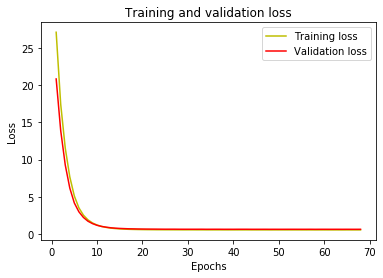

In [264]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

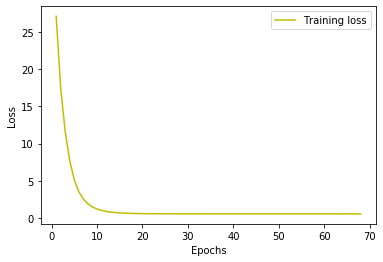

In [265]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
#plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

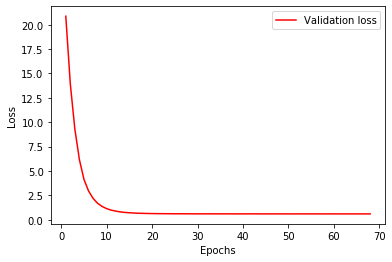

In [266]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(1, len(loss) + 1)
#plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [267]:
weights=autoencoder.get_weights() 
#or
'''
for layer in autoencoder.layers:
    print(layer.get_config(), layer.get_weights())
#or    
first_layer_weights = model.layers[0].get_weights()[0]
first_layer_biases  = model.layers[0].get_weights()[1]
second_layer_weights = model.layers[1].get_weights()[0]
second_layer_biases  = model.layers[1].get_weights()[1]    
'''
#or
#autoencoder.get_layer('conv2d_transpose_27').get_weights()[0]
pass

In [268]:
#x_train = np.expand_dims(x_train, -1).astype("float32")

(2000,)


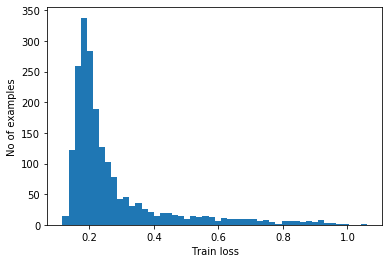

0.27281773

In [269]:
#print(np.shape(x_train))
t0=time.time()
reconstructions = autoencoder.predict(x_train)

x_train_reshaped = np.reshape(x_train, (x_train.shape[0],-1)) 
#print(np.shape(x_train_reshaped))

reconstructions_reshaped = np.reshape(reconstructions, (reconstructions.shape[0],-1)) 
#print(np.shape(reconstructions_reshaped))

#train_loss = tf.keras.losses.mse(x_train_reshaped, reconstructions_reshaped)
#or
train_loss = K.mean(tf.keras.losses.mse(x_train, reconstructions),axis=-1)

print(np.shape(train_loss))

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()
#print( time.time() - t0)
np.mean(train_loss)

In [270]:
np.shape(reconstructions)
max_val = np.max(reconstructions)
min_val = np.min(reconstructions)
max_val, min_val

(1.3700211, -5.601961)

In [271]:
#for i,kk in enumerate(train_loss):
#    if kk<0.00000025:
#        print(i)

In [272]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.43631572


In [273]:
mean_ =  np.mean(train_loss)
print("mean_: ", mean_)

mean_:  0.27281773


(2001, 25, 25)
(2001,)


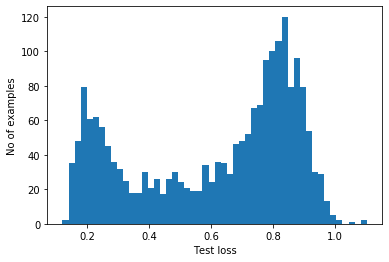

0.61273843

In [274]:
print(np.shape(x_test))
t0=time.time()
reconstructions = autoencoder.predict(x_test)

x_test_reshaped = np.reshape(x_test, (x_test.shape[0],-1)) 
#print(np.shape(x_test_reshaped))

reconstructions_reshaped = np.reshape(reconstructions, (reconstructions.shape[0],-1)) 

#test_loss = tf.keras.losses.mse(reconstructions_reshaped, x_test_reshaped)
#or
test_loss = K.mean(tf.keras.losses.mse(x_test, reconstructions),axis=-1)
print(np.shape(test_loss))


plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()
#print( time.time() - t0)
np.mean(test_loss)

In [275]:
#x_train1[13], seed_ent1[13], train_loss[13] # "great work team"

In [276]:
#x_test1[1000], texts[1104],test_loss[1000]

In [277]:
ind_found=[]
for i,kk in enumerate(test_loss):
    if kk  <threshold:
        ind_found.append(i)
#    if kk>0.12:
#        print(i)
len(ind_found)       

594

In [279]:
#for i in ind_found:
#    print(ent_all[i])

In [1711]:
'''
def predict(model, data, threshold):
  reconstructions = model(data)
  print(np.shape(reconstructions))
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

preds = predict(model_autoencoder, test_data, threshold)
preds
'''
pass

In [1712]:
'''
pred = autoencoder.predict(x_normal_test)
pred=np.reshape(pred, (pred.shape[0],-1)) 
x_normal_test=np.reshape(x_normal_test, (x_normal_test.shape[0],-1)) 
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))

pred = autoencoder.predict(x_train)
pred=np.reshape(pred, (pred.shape[0],-1)) 
x_normal_test=np.reshape(x_normal_test, (x_normal_test.shape[0],-1)) 
score2 = np.sqrt(metrics.mean_squared_error(pred,x_train))

pred = autoencoder.predict(x_abnormal_test)
pred=np.reshape(pred, (pred.shape[0],-1)) 
x_abnormal_test=np.reshape(x_abnormal_test, (x_abnormal_test.shape[0],-1)) 
score3 = np.sqrt(metrics.mean_squared_error(pred,x_abnormal_test))

print(f"Out of Sample Normal error (RMSE): {score1}")
#print(f"Insample Normal error (RMSE): {score2}")
print(f"Abnormal error (RMSE): {score3}")
'''
pass

In [1713]:
seed_ent[10:20]

['make money marketing',
 'top b2b strategies to market your business in',
 'when they do not have the business they start doing business which is not their business .',
 'great work team',
 'rt great team doing important work .',
 'the latest business and money by thanks to investment',
 'no value in the market',
 'the latest business and money by thanks to investment business',
 'business success being there via by',
 'which is more important sales or marketing']

In [1714]:
x_test2=embedder0(['work team','work group','hated song hated song hated song hated song hated song','hated song',
                   'pizza hotel',
                  'woman amp child amp human trafficker euphemism evil sex traffic rapist amp pedophile . drug traffic plague ravage land . fresh flow caravan asylum seeker amp undetected illegals rag . dems wall .'])

(6, 1, 768)
0.14576053619384766


In [1715]:
#x_test2 = (x_test2 - min_val) / (max_val - min_val)

In [1716]:
print(np.shape(x_test2))
t0=time.time()
reconstructions2 = autoencoder.predict(x_test2)

x_test_reshaped2 = np.reshape(x_test2, (x_test2.shape[0],-1)) 
print(np.shape(x_test_reshaped2))

reconstructions_reshaped2 = np.reshape(reconstructions2, (reconstructions2.shape[0],-1)) 

test_loss2 = tf.keras.losses.mse(reconstructions_reshaped2, x_test_reshaped2)
#print(np.shape(test_loss))

plt.hist(test_loss2, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()
print( time.time() - t0)
test_loss2

(6, 1, 768)


ValueError: in user code:

    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\jafar\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer CVAE: expected shape=(None, 25, 25), found shape=(None, 1, 768)


In [1662]:
np.shape(conv_output)

(2001, 20)

In [454]:
func = K.function([autoencoder.get_layer('input_8').input], autoencoder.get_layer('dense_52').output) # index=23
conv_output = func(x_test) 
#conv_output

In [1868]:
texts[2000],texts[2835]

('sovereign people responsibility amp desire reliant derives human dignity . dignity canot derived gov cradle grave schemes amp dependence mere tribal identity . true identity creator',
 'left amp blindly follow sublime ignorance road sex amp forms human trafficking drug smuggling amp form degradation erasing citizenship individual amp national sovereignty . road intentions amp road serfdom .')

In [453]:
a=conv_output[20] # for train

In [455]:
b=conv_output[200]

In [461]:
np.linalg.norm(a-conv_output[20])

23.024239

In [462]:
from scipy.spatial.distance import cosine

print(1 - cosine(conv_output[55], conv_output[2000]) )
print(1 - cosine(conv_output[55], a))
print(1 - cosine(conv_output[200], a ))
print(1 - cosine(conv_output[2000], conv_output[835]) )

0.5708503127098083
0.45175701379776
0.35338667035102844
0.20746617019176483


In [465]:
func1 = K.function([autoencoder.get_layer('input_8').input], autoencoder.get_layer('dense_53').output) # index=23
conv_output1 = func1(x_test) 

In [464]:
a1=conv_output1[20]

In [469]:
np.linalg.norm(a1-conv_output1[200])

4.4961147

In [470]:
print(1 - cosine(conv_output1[55], conv_output1[2000]) )
print(1 - cosine(conv_output1[55], a1))
print(1 - cosine(conv_output1[200], a1))
print(1 - cosine(conv_output1[2000], conv_output1[835]) )

0.5590571761131287
0.5348398685455322
0.2820291817188263
0.12689349055290222


In [479]:
func2 = K.function([autoencoder.get_layer('input_8').input], autoencoder.get_layer('dense_54').output) # index=23
conv_output2 = func2(x_test) 

In [478]:
a2=conv_output2[20]

In [490]:
np.linalg.norm(a2-conv_output2[200])

3.521377

In [481]:
print(1 - cosine(conv_output2[55], conv_output2[2000]) )
print(1 - cosine(conv_output2[55], a2))
print(1 - cosine(conv_output2[200], a2 ))
print(1 - cosine(conv_output2[2000], conv_output2[835]) )

0.6495592594146729
0.6184407472610474
0.3839885890483856
0.18407268822193146


In [485]:
func3 = K.function([autoencoder.get_layer('input_8').input], autoencoder.get_layer('dense_55').output) # index=23
conv_output3 = func3(x_test) 

In [484]:
a3=conv_output3[20]

In [491]:
np.linalg.norm(a3-conv_output3[200])

2.9144344

In [487]:
print(1 - cosine(conv_output3[55], conv_output3[2000]) )
print(1 - cosine(conv_output3[55], a3))
print(1 - cosine(conv_output3[200], a3 ))
print(1 - cosine(conv_output3[2000], conv_output3[835]) )

0.6601640582084656
0.6673491597175598
0.36744484305381775
0.2436715066432953


In [493]:
seed_ent2[20]

'time market'

In [489]:
test_loss[200],train_loss[20]

(<tf.Tensor: shape=(), dtype=float32, numpy=0.013736018>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.03094145>)

In [304]:
from scipy.spatial import distance
dst = distance.euclidean(conv_output[1], conv_output[4])
dist = np.linalg.norm(conv_output[0]-conv_output[5])
dst,dist

(2.6894426345825195, 2.3884826)

In [260]:
text1=['hat song','work team']
a1=embedder2(text1)

(2, 20, 768)
0.06979703903198242


In [334]:
from scipy.spatial.distance import cosine
print(text1[0][7],text1[1][8])
print(1 - cosine(a1[0][0], a1[1][0]) )
print(1 - cosine(a1[0][1], a1[1][1]) )
print(1 - cosine(a1[0][2], a1[1][2]) )
print(1 - cosine(a1[0][3], a1[1][3]) )
print(1 - cosine(a1[0][4], a1[1][4]) )
print(1 - cosine(a1[0][5], a1[1][18]) )
print(1 - cosine(a1[0][19], a1[1][19]) )

NameError: name 'text1' is not defined

In [329]:
a1=['team work']
a2=['hated song']

In [333]:
ans1=embedder(a1)
ans2=embedder2(a1)
ans0=embedder0(a1)
bns1=embedder(a2)
bns2=embedder2(a2)
bns0=embedder0(a2)

(1, 20, 768)
0.049430131912231445
(1, 20, 768)
0.036902427673339844
(1, 20, 768)
0.019643783569335938
(1, 20, 768)
0.05220937728881836
(1, 20, 768)
0.04548144340515137
(1, 20, 768)
0.021014690399169922


In [357]:
np.argwhere(np.isnan(bns0))

array([], shape=(0, 3), dtype=int64)

In [362]:
print(1 - cosine(ans1[0][0], bns2[0][0]))
print(1 - cosine(ans1[0][0], bns2[0][1]))
print(1 - cosine(ans1[0][0], bns2[0][3]))
print(1 - cosine(ans1[0][0], bns2[0][4]))
print(1 - cosine(ans1[0][4], bns2[0][19]))
print(1 - cosine(ans1[0][19], bns2[0][19]))
print()
print(1 - cosine(ans1[0][0], ans2[0][0]))
print(1 - cosine(ans1[0][0], ans2[0][1]))
print(1 - cosine(ans1[0][0], ans2[0][3]))
print(1 - cosine(ans1[0][0], ans2[0][4]))
print(1 - cosine(ans1[0][4], ans2[0][19]))
print(1 - cosine(ans1[0][19], ans2[0][19]))
print()
print(1 - cosine(bns0[0][0], ans0[0][0]))
print(1 - cosine(bns0[0][0], ans0[0][1]))
print(1 - cosine(bns0[0][0], ans0[0][3]))
print(1 - cosine(bns0[0][0], ans0[0][4]))
print(1 - cosine(bns0[0][4], ans0[0][19]))
print(1 - cosine(bns0[0][19], ans0[0][19]))


0.45770159363746643
0.35634854435920715
0.3105013072490692
0.3177756667137146
0.7120208740234375
0.7404587268829346

0.9911509156227112
0.5502008199691772
0.33191806077957153
0.3362172842025757
0.9181116819381714
0.9677206873893738

0.44497671723365784
0.3434632420539856
nan
nan
nan
nan


In [450]:
outputs = [layer.output for layer in autoencoder.layers]          # all layer outputs
outputs

[<KerasTensor: shape=(None, 25, 25) dtype=float32 (created by layer 'input_8')>,
 <KerasTensor: shape=(None, 625) dtype=float32 (created by layer 'flatten_7')>,
 <KerasTensor: shape=(None, 450) dtype=float32 (created by layer 'dense_52')>,
 <KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'dense_53')>,
 <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'dense_54')>,
 <KerasTensor: shape=(None, 14) dtype=float32 (created by layer 'dense_55')>,
 <KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'dense_56')>,
 <KerasTensor: shape=(None, 150) dtype=float32 (created by layer 'dense_57')>,
 <KerasTensor: shape=(None, 450) dtype=float32 (created by layer 'dense_58')>,
 <KerasTensor: shape=(None, 625) dtype=float32 (created by layer 'dense_59')>,
 <KerasTensor: shape=(None, 25, 25) dtype=float32 (created by layer 'reshape_9')>,
 <KerasTensor: shape=(None, 25, 25) dtype=float32 (created by layer 'tf.convert_to_tensor_4')>,
 <KerasTensor: shape=(None, 25,

In [212]:

# with a Sequential model
get_3rd_layer_output = K.function([autoencoder.layers[0].input],
                                  [autoencoder.layers[3].output])
layer_output = get_3rd_layer_output([x_test2])[0]
np.shape(layer_output)

(4, 19, 1, 20)

In [252]:
#autoencoder.layers[1].output.get_shape()
#autoencoder.layers[1].output
#autoencoder.layers[0]._name
#conv_weights = autoencoder.get_layer('conv2d_31').get_weights()  # numpy array

In [242]:
#create new model
layer_output=autoencoder.get_layer(index=3).output   #layer_output=model.get_layer(layer_name).output
intermediate_model=tf.keras.models.Model(inputs=autoencoder.input,outputs=layer_output)
intermediate_prediction=intermediate_model.predict(x_test2)

In [254]:
func = K.function([autoencoder.get_layer('input_6').input], autoencoder.get_layer('sampling_5').output)
conv_output = func([x_test2]) 
conv_output

array([[ 1.7650081e-01,  2.8579620e-01,  6.9967991e-01, -6.2938428e-01,
         8.6302567e-01, -1.2203450e+00, -1.3634030e+00, -9.9799627e-01,
         8.9768344e-01,  2.2071769e+00],
       [-1.0538758e+00, -7.2922969e-01,  4.2215452e-02,  2.8998899e-01,
        -1.6720887e+00, -1.1855352e+00, -9.4671112e-01,  1.0533788e+00,
         1.8272312e-01,  4.5969564e-01],
       [-1.7218441e+00,  1.8279363e-01, -1.3969603e+00, -1.4551117e-03,
         1.1530080e+00, -6.0003912e-01,  1.3282999e+00,  2.5271830e-01,
        -3.0976474e-01, -1.4425912e+00],
       [-3.4123026e-02, -2.9204721e+00, -1.3632357e-01,  2.5320413e+00,
         9.6690679e-01,  8.8957262e-01, -6.7900223e-01,  1.3935624e+00,
        -1.2844133e-01, -1.3498430e-01]], dtype=float32)

In [244]:
#To print the output of a single layer:
from tensorflow.keras import backend as K
layerIndex = 1
func = K.function([autoencoder.get_layer(index=0).input], autoencoder.get_layer(index=layerIndex).output)
layerOutput = func([x_test2])  # input_data is a numpy array
#print(layerOutput)

In [243]:
# To print output of every layer:
from tensorflow.keras import backend as K
for layerIndex, layer in enumerate(autoencoder.layers):
    func = K.function([autoencoder.get_layer(index=0).input], layer.output)
    layerOutput = func([x_test2])  # input_data is a numpy array
#    print(layerOutput)